In [ ]:
#preprocessing starts here
import pandas as pd
import numpy as np
df = pd.read_csv(r"Grenoble_raw.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
df[["Date", "Time"]]=df['Time'].str.split(':', n=1, expand=True)

In [ ]:
df.head()

,UNID,Time,MonDay,SBP,DBP,HR,ERR,Event,VISIT,Valid,Date
0,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,11:54:00,1,141,98,70,1,NaN,1,1,21NOV11
1,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,12:09:00,1,151,101,70,1,NaN,1,1,21NOV11
2,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,12:24:00,1,0,0,0,2,NaN,1,1,21NOV11
3,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,12:27:00,1,0,0,0,2,NaN,1,1,21NOV11
4,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,12:39:00,1,0,0,0,2,NaN,1,1,21NOV11


In [ ]:
df[["Hour", "Minute", "Seconds"]]=df['Time'].str.split(':', expand=True)

In [ ]:
df.head()
df['Hour'] = df['Hour'].astype(int)
df["Type"] = np.where((df["Hour"]>6) & (df["Hour"]<18), 'Day', 'Night')
df.tail()

,UNID,Time,MonDay,SBP,DBP,HR,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds,Type
30802,ffad3cfc-b785-4ad4-8492-d7968c0e1aaa,11:36:00,2,0,0,0,2,NaN,1,1,04OCT11,11,36,00,Day
30803,ffad3cfc-b785-4ad4-8492-d7968c0e1aaa,11:39:00,2,0,0,0,2,NaN,1,1,04OCT11,11,39,00,Day
30804,ffad3cfc-b785-4ad4-8492-d7968c0e1aaa,11:51:00,2,0,0,0,2,NaN,1,1,04OCT11,11,51,00,Day
30805,ffad3cfc-b785-4ad4-8492-d7968c0e1aaa,11:54:00,2,117,74,78,1,NaN,1,1,04OCT11,11,54,00,Day
30806,ffad3cfc-b785-4ad4-8492-d7968c0e1aaa,12:05:00,2,131,93,87,1,NaN,1,1,04OCT11,12,05,00,Day


In [ ]:
df.to_csv("separated.csv", index=False)

In [ ]:
df.groupby(['UNID','Type'], as_index=False)['SBP', "DBP"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,UNID,Type,SBP,DBP
0,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Day,91.410714,62.357143
1,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Night,110.292683,70.463415
2,00cddb53-7b81-43db-98bb-1462e7843957,Day,61.273973,35.479452
3,00cddb53-7b81-43db-98bb-1462e7843957,Night,121.926829,65.048780
4,010037c3-c29f-4d72-8d55-765a491164bd,Day,69.755556,41.166667
...,...,...,...,...
561,faadfd25-3449-45cd-8c96-27eb055f35dc,Night,120.471698,59.075472
562,fc7f9de0-f972-438f-8c04-e47fee2b4d7e,Day,55.106061,34.621212
563,fc7f9de0-f972-438f-8c04-e47fee2b4d7e,Night,93.904762,56.476190
564,ffad3cfc-b785-4ad4-8492-d7968c0e1aaa,Day,69.130435,41.144928


In [ ]:
df2 =df.groupby(['UNID','Type'], as_index=False).agg({'SBP':'mean', 'DBP':'mean', "MonDay":"first","HR":"first","ERR":"first","Event":"first","VISIT":"first","Valid":"first","Date":"first","Hour":"first","Minute":"first","Seconds":"first" })

In [ ]:
day_df = df2

In [ ]:
day_df.drop(day_df[day_df.Type == "Night"].index, inplace=True)

In [ ]:
day_df.head()

,UNID,Type,SBP,DBP,MonDay,HR,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds
0,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Day,91.410714,62.357143,1,70,1,None,1,1,21NOV11,11,54,00
2,00cddb53-7b81-43db-98bb-1462e7843957,Day,61.273973,35.479452,1,83,1,None,1,1,24JUN11,10,59,00
4,010037c3-c29f-4d72-8d55-765a491164bd,Day,69.755556,41.166667,1,88,1,None,1,1,27DEC11,10,45,00
6,011f89f7-90b8-407b-9050-175194e9f9ea,Day,88.133333,59.250000,1,46,1,None,1,1,19OCT11,10,19,00
8,01e13b8b-4fa9-428c-ac47-f55006524c0b,Day,56.042254,38.760563,1,65,1,None,1,1,11MAY11,12,32,00


In [ ]:
df2 =df.groupby(['UNID','Type'], as_index=False).agg({'SBP':'mean', 'DBP':'mean', "MonDay":"first","HR":"first","ERR":"first","Event":"first","VISIT":"first","Valid":"first","Date":"first","Hour":"first","Minute":"first","Seconds":"first" })
night_df = df2
night_df.head()

,UNID,Type,SBP,DBP,MonDay,HR,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds
0,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Day,91.410714,62.357143,1,70,1,None,1,1,21NOV11,11,54,00
1,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Night,110.292683,70.463415,1,111,1,None,1,1,21NOV11,18,09,00
2,00cddb53-7b81-43db-98bb-1462e7843957,Day,61.273973,35.479452,1,83,1,None,1,1,24JUN11,10,59,00
3,00cddb53-7b81-43db-98bb-1462e7843957,Night,121.926829,65.048780,1,75,1,None,1,1,24JUN11,18,13,00
4,010037c3-c29f-4d72-8d55-765a491164bd,Day,69.755556,41.166667,1,88,1,None,1,1,27DEC11,10,45,00


In [ ]:
night_df.drop(night_df[night_df.Type == "Day"].index, inplace=True)

In [ ]:
night_df.head()

,UNID,Type,SBP,DBP,MonDay,HR,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds
1,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Night,110.292683,70.463415,1,111,1,None,1,1,21NOV11,18,09,00
3,00cddb53-7b81-43db-98bb-1462e7843957,Night,121.926829,65.048780,1,75,1,None,1,1,24JUN11,18,13,00
5,010037c3-c29f-4d72-8d55-765a491164bd,Night,96.770833,53.291667,1,90,1,None,1,1,27DEC11,18,00,00
7,011f89f7-90b8-407b-9050-175194e9f9ea,Night,109.953488,72.744186,1,46,1,None,1,1,19OCT11,18,03,00
9,01e13b8b-4fa9-428c-ac47-f55006524c0b,Night,87.531915,57.425532,1,72,1,None,1,1,11MAY11,18,02,00


In [ ]:
day_df.rename(columns = {'SBP':'SBP_Day', 'DBP':'DBP_Day'}, inplace = True)

In [ ]:
night_df.rename(columns = {'SBP':'SBP_Night', 'DBP':'DBP_Night'}, inplace = True)

In [ ]:
day_df.head()

,UNID,Type,SBP_Day,DBP_Day,MonDay,HR,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds
0,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Day,91.410714,62.357143,1,70,1,None,1,1,21NOV11,11,54,00
2,00cddb53-7b81-43db-98bb-1462e7843957,Day,61.273973,35.479452,1,83,1,None,1,1,24JUN11,10,59,00
4,010037c3-c29f-4d72-8d55-765a491164bd,Day,69.755556,41.166667,1,88,1,None,1,1,27DEC11,10,45,00
6,011f89f7-90b8-407b-9050-175194e9f9ea,Day,88.133333,59.250000,1,46,1,None,1,1,19OCT11,10,19,00
8,01e13b8b-4fa9-428c-ac47-f55006524c0b,Day,56.042254,38.760563,1,65,1,None,1,1,11MAY11,12,32,00


In [ ]:
night_df.head()

,UNID,Type,SBP_Night,DBP_Night,MonDay,HR,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds
1,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Night,110.292683,70.463415,1,111,1,None,1,1,21NOV11,18,09,00
3,00cddb53-7b81-43db-98bb-1462e7843957,Night,121.926829,65.048780,1,75,1,None,1,1,24JUN11,18,13,00
5,010037c3-c29f-4d72-8d55-765a491164bd,Night,96.770833,53.291667,1,90,1,None,1,1,27DEC11,18,00,00
7,011f89f7-90b8-407b-9050-175194e9f9ea,Night,109.953488,72.744186,1,46,1,None,1,1,19OCT11,18,03,00
9,01e13b8b-4fa9-428c-ac47-f55006524c0b,Night,87.531915,57.425532,1,72,1,None,1,1,11MAY11,18,02,00


In [ ]:
merger = day_df

In [ ]:
merger.head()

,UNID,Type,SBP_Day,DBP_Day,MonDay,HR,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds
0,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Day,91.410714,62.357143,1,70,1,None,1,1,21NOV11,11,54,00
2,00cddb53-7b81-43db-98bb-1462e7843957,Day,61.273973,35.479452,1,83,1,None,1,1,24JUN11,10,59,00
4,010037c3-c29f-4d72-8d55-765a491164bd,Day,69.755556,41.166667,1,88,1,None,1,1,27DEC11,10,45,00
6,011f89f7-90b8-407b-9050-175194e9f9ea,Day,88.133333,59.250000,1,46,1,None,1,1,19OCT11,10,19,00
8,01e13b8b-4fa9-428c-ac47-f55006524c0b,Day,56.042254,38.760563,1,65,1,None,1,1,11MAY11,12,32,00


In [ ]:
merger = merger.reset_index()

In [ ]:
night_df = night_df.reset_index()

In [ ]:
merger = merger.join(night_df[["SBP_Night", "DBP_Night"]])

In [ ]:
merger.head()

,index,UNID,Type,SBP_Day,DBP_Day,MonDay,HR,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds,SBP_Night,DBP_Night
0,0,00abb1bc-7621-4e68-8fe9-cb63838ae9ca,Day,91.410714,62.357143,1,70,1,None,1,1,21NOV11,11,54,00,110.292683,70.463415
1,2,00cddb53-7b81-43db-98bb-1462e7843957,Day,61.273973,35.479452,1,83,1,None,1,1,24JUN11,10,59,00,121.926829,65.048780
2,4,010037c3-c29f-4d72-8d55-765a491164bd,Day,69.755556,41.166667,1,88,1,None,1,1,27DEC11,10,45,00,96.770833,53.291667
3,6,011f89f7-90b8-407b-9050-175194e9f9ea,Day,88.133333,59.250000,1,46,1,None,1,1,19OCT11,10,19,00,109.953488,72.744186
4,8,01e13b8b-4fa9-428c-ac47-f55006524c0b,Day,56.042254,38.760563,1,65,1,None,1,1,11MAY11,12,32,00,87.531915,57.425532


In [ ]:
merger.to_csv(r"averaged.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 10]

#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df_merge = pd.read_csv(r"averaged.csv")
df_patientfiles = pd.read_csv(r"Grenoble.csv")

In [ ]:
df_patientfiles.rename(columns={"UnID": "UNID","VAR3":"Sex","VAR6":"Presence_of_diabetes","VAR15":"BMI","VAR41":"Clinic_seated_sbp","VAR42":"Clinic_seated_dbp","VAR45":"AHI_tot","VAR46":"Mean_nocturnal_satO2","VAR47":"Min_nocturnal_satO2","VAR49":"PWV","VAR50":"Delay_time_car_fem","VAR51":"Car_fem_distance","VAR52":"Creatinine","VAR53":"Glucose","VAR54":"Total_cholesterol","VAR55":"Triglycerides","VAR56":"HDL","VAR57":"LDL"}, inplace=True)

df_patientfiles.head()


,num,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nDBPnFix,nHRnFix,nSBPsdnFix,nMBPsdnFix,nDBPsdnFix,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI
0,1,42,M,no,no,no,no,yes,28,no,...,71.86667,99.30000,35.115380,25.355420,21.948370,21.681260,12.865390,10.173080,6.846154,0.370339
1,2,58,M,no,no,no,yes,no,16.25,yes,...,65.00000,54.75000,8.956460,8.295672,9.672830,4.390071,8.256757,6.148649,6.054054,0.406565
2,5,48,F,no,no,no,yes,yes,18,no,...,61.75000,69.08334,10.227710,7.246734,8.465169,7.153617,9.131147,7.131147,8.459017,0.427954
3,7,73,M,yes,no,no,yes,no,32,yes,...,68.83334,49.25000,8.233400,8.305955,10.049320,1.751190,10.222220,8.000000,2.666667,0.497447
4,8,51,M,no,no,yes,no,no,0,yes,...,66.41666,76.08334,7.577878,5.736645,4.601548,5.247654,10.250000,6.776316,5.552631,0.649434


In [ ]:
df_patientfiles.to_csv("patient_data_rename.csv", index=False)

In [ ]:
combine_data = pd.merge(df_patientfiles, df_merge, on="UNID")

combine_data

,num,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,ERR,Event,VISIT,Valid,Date,Hour,Minute,Seconds,SBP_Night,DBP_Night
0,1,42,M,no,no,no,no,yes,28,no,...,2,Conduit,1,1,28AUG09,10,50,0,27.816667,16.691667
1,2,58,M,no,no,no,yes,no,16.25,yes,...,1,Conduit,1,1,28AUG09,15,57,0,109.292683,62.926829
2,5,48,F,no,no,no,yes,yes,18,no,...,2,NaN,1,1,08SEP09,11,47,0,93.904762,56.476190
3,7,73,M,yes,no,no,yes,no,32,yes,...,1,Marche,1,1,11SEP09,10,42,0,88.413043,49.760870
4,8,51,M,no,no,yes,no,no,0,yes,...,1,NaN,1,1,11SEP09,17,47,0,110.765957,62.106383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,339,53,M,no,no,no,yes,no,8,yes,...,1,NaN,1,1,03APR12,11,55,0,113.750000,68.525000
279,340,51,F,no,no,no,no,no,0,no,...,1,NaN,1,1,02APR12,16,39,0,104.720930,64.441860
280,341,62,M,no,no,yes,no,no,0,yes,...,2,NaN,1,1,10APR12,12,21,0,136.023256,87.209302
281,342,56,M,no,no,no,yes,yes,76,yes,...,1,NaN,1,1,10APR12,11,28,0,108.636364,61.159091


In [ ]:
combine_data.to_csv(r"combine_datasets.csv", index=False)
combine_data.isnull().sum()

num                                 0
Age__years_                         0
Sex                                 0
Presence_of_coronary_artery_dise    0
Presence_of_cerebrovascula_disea    0
                                   ..
Hour                                0
Minute                              0
Seconds                             0
SBP_Night                           0
DBP_Night                           0
Length: 103, dtype: int64

In [ ]:
combine_data['OSA_Severity']='N'
#Then replace the N with the number representing the severity of OSA value
#(Normal=1, Mild=2, Moderate=3, Severe=4)

for i in range(0,len(combine_data)):
    if combine_data.loc[i,'AHI_tot']<=5:
        combine_data.loc[i,'OSA_Severity']='1'
    elif combine_data.loc[i,'AHI_tot']<=15:
        combine_data.loc[i,'OSA_Severity']='2'
    elif combine_data.loc[i,'AHI_tot']<=30:
        combine_data.loc[i,'OSA_Severity']='3'
    elif combine_data.loc[i,'AHI_tot']>30:
        combine_data.loc[i,'OSA_Severity']='4'
#print(combine_data)


In [ ]:
combine_data.to_csv(r"OSA_Severity", index=False)

In [ ]:
combine_data['OSA_Severity'].value_counts()

4    193
3     83
2      7
Name: OSA_Severity, dtype: int64

In [ ]:
data= pd.read_csv(r'combine_OSA_severity.csv')

In [ ]:
data.replace('yes', 1, regex=True)

,num,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI,Day Avg SBP,Day Avg DBP,Night Avg SBP,Night Avg DBP,OSA_Severity
0,1,42,M,no,no,no,no,1,28,no,...,21.681260,12.865390,10.173080,6.846154,0.370339,28.237500,16.883333,27.364486,16.345794,4
1,2,58,M,no,no,no,1,no,16.25,1,...,4.390071,8.256757,6.148649,6.054054,0.406565,98.740000,56.940000,108.000000,62.305556,4
2,5,48,F,no,no,no,1,1,18,no,...,7.153617,9.131147,7.131147,8.459017,0.427954,70.194444,43.120370,105.228571,63.285714,3
3,7,73,M,1,no,no,1,no,32,1,...,1.751190,10.222220,8.000000,2.666667,0.497447,65.412844,37.018349,99.789474,55.842105,4
4,8,51,M,no,no,1,no,no,0,1,...,5.247654,10.250000,6.776316,5.552631,0.649434,100.252427,56.825243,105.682927,59.219512,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,339,53,M,no,no,no,1,no,8,1,...,6.499417,8.108434,6.674699,10.734940,0.597349,100.138298,62.617021,112.805556,67.666667,4
279,340,51,F,no,no,no,no,no,0,no,...,3.824760,7.047059,6.411765,6.776471,0.374599,108.369565,68.695652,103.666667,63.564103,4
280,341,62,M,no,no,1,no,no,0,1,...,4.818525,10.047620,7.726191,4.797619,0.406500,126.400000,85.390000,134.358974,85.435897,3
281,342,56,M,no,no,no,1,1,76,1,...,2.745520,10.078950,5.578948,3.907895,0.520752,89.846154,51.711538,106.550000,60.025000,4


In [ ]:
data = data.replace('no', 0, regex=True)

In [ ]:
data=data.replace('M', 1, regex=True)

In [ ]:
data=data.replace('F', 0, regex=True)

In [ ]:
data=data.replace('history of HT reported / no office HT / no treatment', 1, regex=True)
data=data.replace('history of HT reported / no office HT / treatment', 2, regex=True)
data=data.replace('history of HT reported / office HT / no treatment', 3, regex=True)
data=data.replace('history of HT reported / office HT / treatment', 4, regex=True)
data=data.replace('no history of HT reported / no office HT / no treatment', 6, regex=True)
data=data.replace('no history of HT reported / office HT / no treatment', 7, regex=True)
data=data.replace('no history of HT reported / office HT / treatment', 8, regex=True)

In [ ]:
data=data.replace('no history of HT reported', 0, regex=True)
data=data.replace('MD', 0, regex=True)
data=data.replace('MD (but > 0)', 0, regex=True)

In [ ]:
data.to_csv(r'Processedversion1.csv', index=False)

In [ ]:
datapro= pd.read_csv(r'Processedversion1.csv')

In [ ]:
datapro=datapro.drop(['_Date'], axis=1)

In [ ]:
datapro.to_csv(r'Processedversion2.csv', index=False)

In [ ]:
datapro2=pd.read_csv(r'Binary_and_continous_features.csv')

In [ ]:
datapro2.isnull()

,UNID,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI,Day Avg SBP,Day Avg DBP,Night Avg SBP,Night Avg DBP,OSA_Severity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
279,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['dDBPnFix'].isnull().sum()

0

Missing Values replace by the Mean

In [ ]:
from sklearn.impute import SimpleImputer
df = pd.read_csv('Binary_and_continous_features.csv')
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['dMBPnFix','dDBPnFix','dHRnFix',"dSBPsdnFix","dMBPsdnFix","dDBPsdnFix","dHRsdnFix","nSBPnFix","nMBPnFix","nDBPnFix","nHRnFix","nSBPsdnFix","nMBPsdnFix","nDBPsdnFix","nHRsdnFix"]])
df[['dMBPnFix','dDBPnFix','dHRnFix',"dSBPsdnFix","dMBPsdnFix","dDBPsdnFix","dHRsdnFix","nSBPnFix","nMBPnFix","nDBPnFix","nHRnFix","nSBPsdnFix","nMBPsdnFix","nDBPsdnFix","nHRsdnFix"]] = imputer.transform(df[['dMBPnFix','dDBPnFix','dHRnFix',"dSBPsdnFix","dMBPsdnFix","dDBPsdnFix","dHRsdnFix","nSBPnFix","nMBPnFix","nDBPnFix","nHRnFix","nSBPsdnFix","nMBPsdnFix","nDBPsdnFix","nHRsdnFix"]])
df

,UNID,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI,Day Avg SBP,Day Avg DBP,Night Avg SBP,Night Avg DBP,OSA_Severity
0,d1e81ac5-d7f3-4e83-aa02-6b36f517fc60,42,1,0,0,0,0,1,28.00,0,...,21.681260,12.865390,10.173080,6.846154,0.370339,28.237500,16.883333,27.364486,16.345794,4
1,100b6949-5b84-47c8-b8f5-cc24db323288,58,1,0,0,0,1,0,16.25,1,...,4.390071,8.256757,6.148649,6.054054,0.406565,98.740000,56.940000,108.000000,62.305556,4
2,fc7f9de0-f972-438f-8c04-e47fee2b4d7e,48,0,0,0,0,1,1,18.00,0,...,7.153617,9.131147,7.131147,8.459017,0.427954,70.194444,43.120370,105.228571,63.285714,3
3,a758b176-096d-4b6b-a2ff-29c572b56db9,73,1,1,0,0,1,0,32.00,1,...,1.751190,10.222220,8.000000,2.666667,0.497447,65.412844,37.018349,99.789474,55.842105,4
4,d012f10b-5add-49ac-b2bf-dd6e94567d01,51,1,0,0,1,0,0,0.00,1,...,5.247654,10.250000,6.776316,5.552631,0.649434,100.252427,56.825243,105.682927,59.219512,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,83616881-54a1-47c6-882d-328e44f119ae,53,1,0,0,0,1,0,8.00,1,...,6.499417,8.108434,6.674699,10.734940,0.597349,100.138298,62.617021,112.805556,67.666667,4
279,e5224cff-00f5-4b58-9389-3505db7a5559,51,0,0,0,0,0,0,0.00,0,...,3.824760,7.047059,6.411765,6.776471,0.374599,108.369565,68.695652,103.666667,63.564103,4
280,952dccfd-42b9-4d7c-960b-927ac519282a,62,1,0,0,1,0,0,0.00,1,...,4.818525,10.047620,7.726191,4.797619,0.406500,126.400000,85.390000,134.358974,85.435897,3
281,f356f0fc-24a1-49cd-bc46-d21db3cd2a8a,56,1,0,0,0,1,1,76.00,1,...,2.745520,10.078950,5.578948,3.907895,0.520752,89.846154,51.711538,106.550000,60.025000,4


In [ ]:
datapro0=datapro2["dMBPnFix"].fillna(datapro2["dMBPnFix"].mean())
datapro01=datapro2["dDBPnFix"].fillna(datapro2["dDBPnFix"].mean())
datapro02=datapro2["dHRnFix"].fillna(datapro2["dHRnFix"].mean())
datapro03=datapro2["dSBPsdnFix"].fillna(datapro2["dSBPsdnFix"].mean())
datapro04=datapro2["dMBPsdnFix"].fillna(datapro2["dMBPsdnFix"].mean())
datapro05=datapro2["dDBPsdnFix"].fillna(datapro2["dDBPsdnFix"].mean())
datapro06=datapro2["dHRsdnFix"].fillna(datapro2["dHRsdnFix"].mean())
datapro07=datapro2["nSBPnFix"].fillna(datapro2["nSBPnFix"].mean())
datapro08=datapro2["nMBPnFix"].fillna(datapro2["nMBPnFix"].mean())
datapro09=datapro2["nDBPnFix"].fillna(datapro2["nDBPnFix"].mean())
datapro10=datapro2["nHRnFix"].fillna(datapro2["nHRnFix"].mean())
datapro11=datapro2["nSBPsdnFix"].fillna(datapro2["nSBPsdnFix"].mean())
datapro12=datapro2["nMBPsdnFix"].fillna(datapro2["nMBPsdnFix"].mean())
datapro13=datapro2["nDBPsdnFix"].fillna(datapro2["nDBPsdnFix"].mean())
datapro14=datapro2["nHRsdnFix"].fillna(datapro2["nHRsdnFix"].mean())

In [ ]:
df

,UNID,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI,Day Avg SBP,Day Avg DBP,Night Avg SBP,Night Avg DBP,OSA_Severity
0,d1e81ac5-d7f3-4e83-aa02-6b36f517fc60,42,1,0,0,0,0,1,28.00,0,...,21.681260,12.865390,10.173080,6.846154,0.370339,28.237500,16.883333,27.364486,16.345794,4
1,100b6949-5b84-47c8-b8f5-cc24db323288,58,1,0,0,0,1,0,16.25,1,...,4.390071,8.256757,6.148649,6.054054,0.406565,98.740000,56.940000,108.000000,62.305556,4
2,fc7f9de0-f972-438f-8c04-e47fee2b4d7e,48,0,0,0,0,1,1,18.00,0,...,7.153617,9.131147,7.131147,8.459017,0.427954,70.194444,43.120370,105.228571,63.285714,3
3,a758b176-096d-4b6b-a2ff-29c572b56db9,73,1,1,0,0,1,0,32.00,1,...,1.751190,10.222220,8.000000,2.666667,0.497447,65.412844,37.018349,99.789474,55.842105,4
4,d012f10b-5add-49ac-b2bf-dd6e94567d01,51,1,0,0,1,0,0,0.00,1,...,5.247654,10.250000,6.776316,5.552631,0.649434,100.252427,56.825243,105.682927,59.219512,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,83616881-54a1-47c6-882d-328e44f119ae,53,1,0,0,0,1,0,8.00,1,...,6.499417,8.108434,6.674699,10.734940,0.597349,100.138298,62.617021,112.805556,67.666667,4
279,e5224cff-00f5-4b58-9389-3505db7a5559,51,0,0,0,0,0,0,0.00,0,...,3.824760,7.047059,6.411765,6.776471,0.374599,108.369565,68.695652,103.666667,63.564103,4
280,952dccfd-42b9-4d7c-960b-927ac519282a,62,1,0,0,1,0,0,0.00,1,...,4.818525,10.047620,7.726191,4.797619,0.406500,126.400000,85.390000,134.358974,85.435897,3
281,f356f0fc-24a1-49cd-bc46-d21db3cd2a8a,56,1,0,0,0,1,1,76.00,1,...,2.745520,10.078950,5.578948,3.907895,0.520752,89.846154,51.711538,106.550000,60.025000,4


In [ ]:
#preprocessing ends here

In [ ]:
import pandas
df = pandas.read_csv(r'Binary_and_continous_features.csv')

In [ ]:
df.isnull()

,UNID,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI,Day Avg SBP,Day Avg DBP,Night Avg SBP,Night Avg DBP,OSA_Severity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
279,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


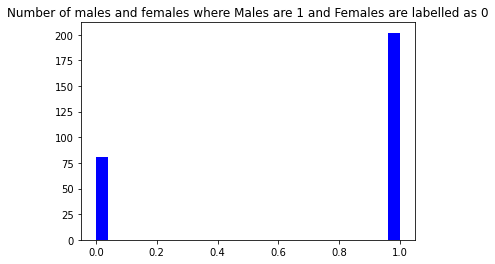

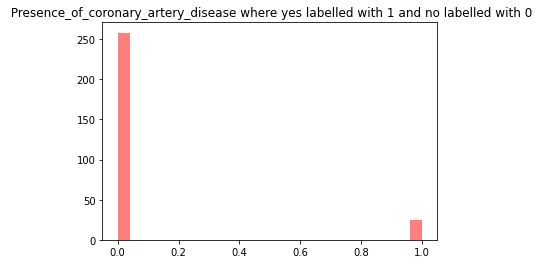

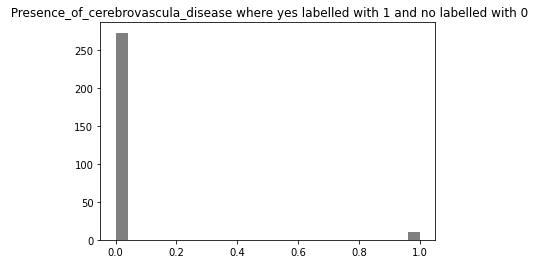

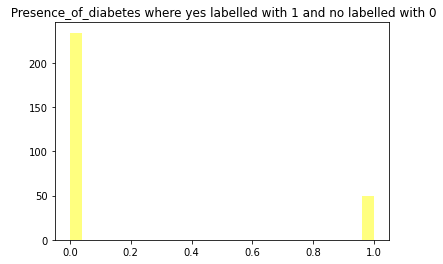

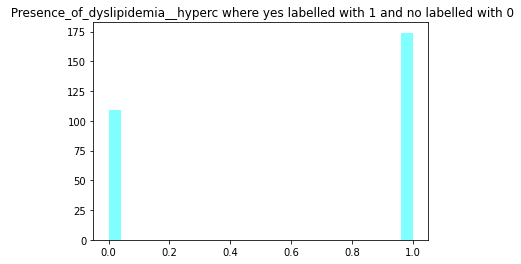

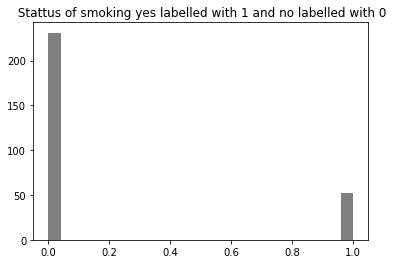

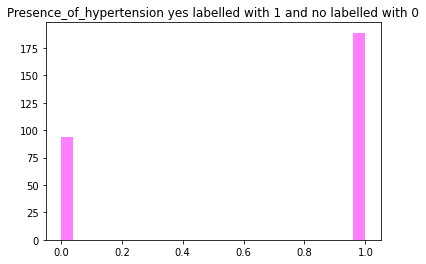

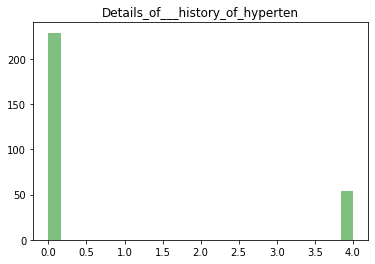

In [ ]:
#histogram of categorical variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# creating a histogram
plt.hist(df['Sex'],bins = 25, color = 'blue')
plt.title("Number of males and females where Males are 1 and Females are labelled as 0")
plt.show()
plt.hist(df['Presence_of_coronary_artery_dise'],bins = 25, alpha = 0.5,
         color = 'red')
plt.title(" Presence_of_coronary_artery_disease where yes labelled with 1 and no labelled with 0")
plt.show()
plt.hist(df['Presence_of_cerebrovascula_disea'],bins = 25, alpha = 0.5,
         color = 'black')
plt.title(" Presence_of_cerebrovascula_disease where yes labelled with 1 and no labelled with 0")
plt.show()
plt.hist(df['Presence_of_diabetes'],bins = 25, alpha = 0.5,
         color = 'yellow')
#'Smoking_behavior___current_smoki','Presence_of_hypertension__yes_no','Details_of___history_of_hyperten',])

plt.title(" Presence_of_diabetes where yes labelled with 1 and no labelled with 0")
plt.show()
plt.hist(df['Presence_of_dyslipidemia__hyperc'],bins = 25, alpha = 0.5,
         color = 'cyan')
plt.title(" Presence_of_dyslipidemia__hyperc where yes labelled with 1 and no labelled with 0")
plt.show()
plt.hist(df['Smoking_behavior___current_smoki'],bins = 25, alpha = 0.5,
         color = 'black')
plt.title(" Stattus of smoking yes labelled with 1 and no labelled with 0")
plt.show()
plt.hist(df['Presence_of_hypertension__yes_no'],bins = 25, alpha = 0.5,
         color = 'magenta')
plt.title("Presence_of_hypertension yes labelled with 1 and no labelled with 0")
plt.show()
plt.hist(df['Details_of___history_of_hyperten'],bins = 25, alpha = 0.5,
         color = 'green')
plt.title("Details_of___history_of_hyperten")
plt.show()

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested seque

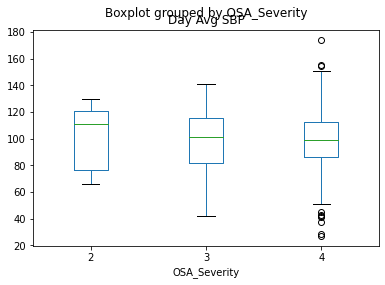

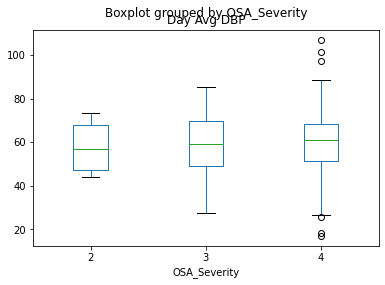

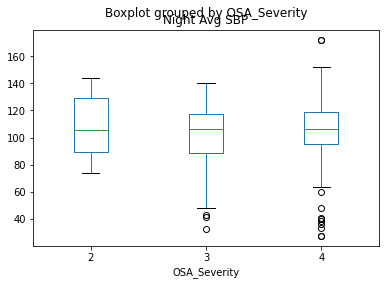

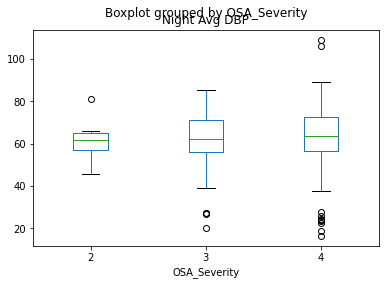

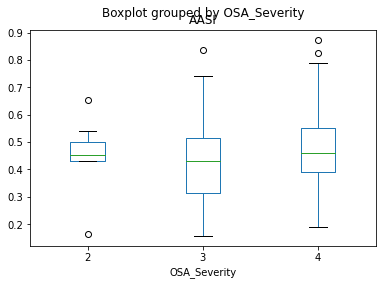

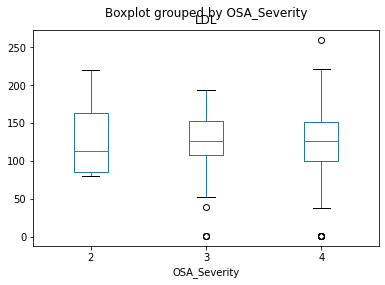

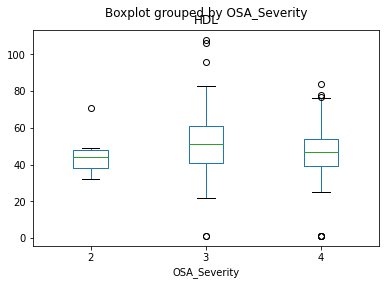

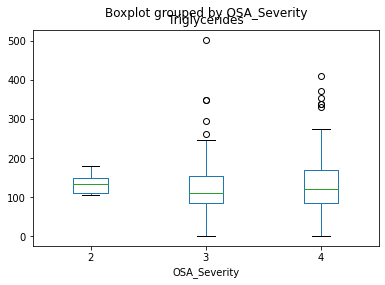

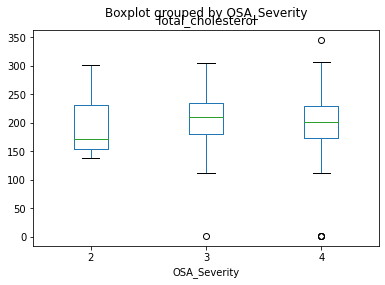

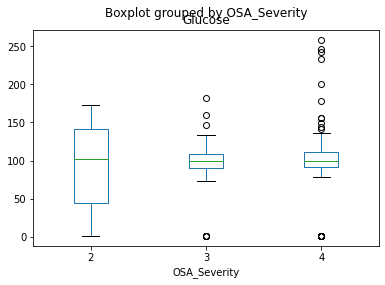

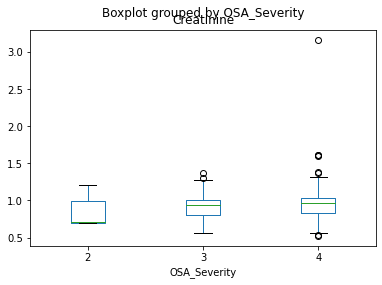

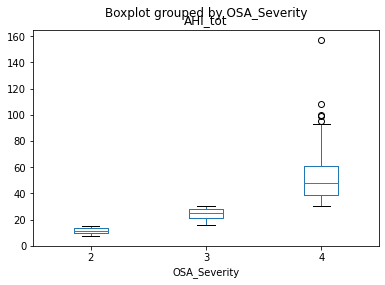

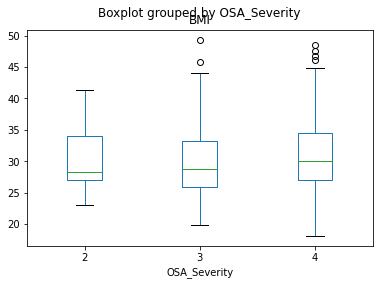

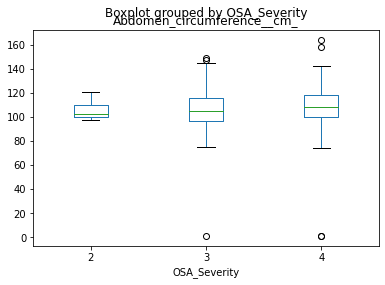

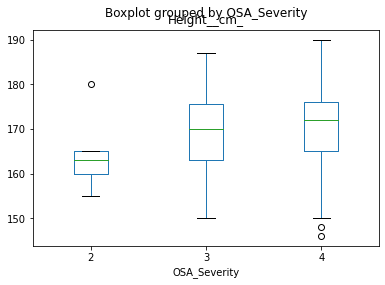

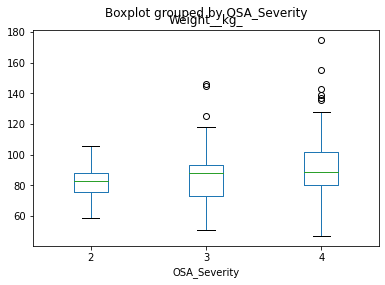

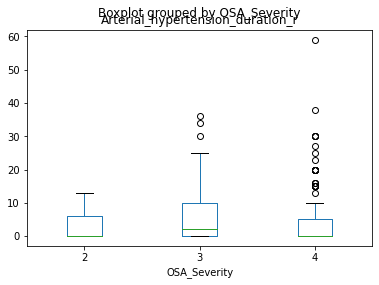

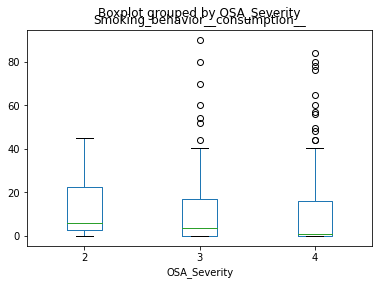

In [ ]:
#boxplots of important variables with respect to OSA_severity
df.boxplot(by ='OSA_Severity', column =['Day Avg SBP'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Day Avg DBP'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Night Avg SBP'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Night Avg DBP'], grid = False)
df.boxplot(by ='OSA_Severity', column =['AASI'], grid = False)
df.boxplot(by ='OSA_Severity', column =['LDL'], grid = False)
df.boxplot(by ='OSA_Severity', column =['HDL'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Triglycerides'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Total_cholesterol'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Glucose'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Creatinine'], grid = False)
df.boxplot(by ='OSA_Severity', column =['AHI_tot'], grid = False)
df.boxplot(by ='OSA_Severity', column =['BMI'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Abdomen_circumference__cm_'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Height__cm_'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Weight__kg_'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Arterial_hypertension_duration_r'], grid = False)
df.boxplot(by ='OSA_Severity', column =['Smoking_behavior__consumption__'], grid = False)

In [ ]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:

    !pip install catboost
    !pip install ipywidgets
    !jupyter nbextension enable --py widgetsnbextension
    !pip install shap
    print('Environment: Google Colab')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Environment: Google Colab


In [ ]:
df

,UNID,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI,Day Avg SBP,Day Avg DBP,Night Avg SBP,Night Avg DBP,OSA_Severity
0,d1e81ac5-d7f3-4e83-aa02-6b36f517fc60,42,1,0,0,0,0,1,28.00,0,...,21.681260,12.865390,10.173080,6.846154,0.370339,28.237500,16.883333,27.364486,16.345794,4
1,100b6949-5b84-47c8-b8f5-cc24db323288,58,1,0,0,0,1,0,16.25,1,...,4.390071,8.256757,6.148649,6.054054,0.406565,98.740000,56.940000,108.000000,62.305556,4
2,fc7f9de0-f972-438f-8c04-e47fee2b4d7e,48,0,0,0,0,1,1,18.00,0,...,7.153617,9.131147,7.131147,8.459017,0.427954,70.194444,43.120370,105.228571,63.285714,3
3,a758b176-096d-4b6b-a2ff-29c572b56db9,73,1,1,0,0,1,0,32.00,1,...,1.751190,10.222220,8.000000,2.666667,0.497447,65.412844,37.018349,99.789474,55.842105,4
4,d012f10b-5add-49ac-b2bf-dd6e94567d01,51,1,0,0,1,0,0,0.00,1,...,5.247654,10.250000,6.776316,5.552631,0.649434,100.252427,56.825243,105.682927,59.219512,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,83616881-54a1-47c6-882d-328e44f119ae,53,1,0,0,0,1,0,8.00,1,...,6.499417,8.108434,6.674699,10.734940,0.597349,100.138298,62.617021,112.805556,67.666667,4
279,e5224cff-00f5-4b58-9389-3505db7a5559,51,0,0,0,0,0,0,0.00,0,...,3.824760,7.047059,6.411765,6.776471,0.374599,108.369565,68.695652,103.666667,63.564103,4
280,952dccfd-42b9-4d7c-960b-927ac519282a,62,1,0,0,1,0,0,0.00,1,...,4.818525,10.047620,7.726191,4.797619,0.406500,126.400000,85.390000,134.358974,85.435897,3
281,f356f0fc-24a1-49cd-bc46-d21db3cd2a8a,56,1,0,0,0,1,1,76.00,1,...,2.745520,10.078950,5.578948,3.907895,0.520752,89.846154,51.711538,106.550000,60.025000,4


In [ ]:
#Plot maximum visualizations that should include feature importance, SHAP and all possible other visualizations.
import catboost
from catboost import *
import shap
shap.initjs()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X = df.iloc[:,1:89].values
Y = df.iloc[:,89].values
model = CatBoostClassifier(iterations=300, learning_rate=0.1, random_seed=123)
model.fit(X, Y, verbose=False, plot=False)

In [ ]:
X

array([[ 42.        ,   1.        ,   0.        , ...,  16.88333333,
         27.36448598,  16.34579439],
       [ 58.        ,   1.        ,   0.        , ...,  56.94      ,
        108.        ,  62.30555556],
       [ 48.        ,   0.        ,   0.        , ...,  43.12037037,
        105.2285714 ,  63.28571429],
       ...,
       [ 62.        ,   1.        ,   0.        , ...,  85.39      ,
        134.3589744 ,  85.43589744],
       [ 56.        ,   1.        ,   0.        , ...,  51.71153846,
        106.55      ,  60.025     ],
       [ 49.        ,   1.        ,   0.        , ...,  59.72115385,
        116.7837838 ,  75.86486486]])

In [ ]:
shapD= df.drop("AHI_tot",axis= 1)
shapD

,UNID,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI,Day Avg SBP,Day Avg DBP,Night Avg SBP,Night Avg DBP,OSA_Severity
0,d1e81ac5-d7f3-4e83-aa02-6b36f517fc60,42,1,0,0,0,0,1,28.00,0,...,21.681260,12.865390,10.173080,6.846154,0.370339,28.237500,16.883333,27.364486,16.345794,4
1,100b6949-5b84-47c8-b8f5-cc24db323288,58,1,0,0,0,1,0,16.25,1,...,4.390071,8.256757,6.148649,6.054054,0.406565,98.740000,56.940000,108.000000,62.305556,4
2,fc7f9de0-f972-438f-8c04-e47fee2b4d7e,48,0,0,0,0,1,1,18.00,0,...,7.153617,9.131147,7.131147,8.459017,0.427954,70.194444,43.120370,105.228571,63.285714,3
3,a758b176-096d-4b6b-a2ff-29c572b56db9,73,1,1,0,0,1,0,32.00,1,...,1.751190,10.222220,8.000000,2.666667,0.497447,65.412844,37.018349,99.789474,55.842105,4
4,d012f10b-5add-49ac-b2bf-dd6e94567d01,51,1,0,0,1,0,0,0.00,1,...,5.247654,10.250000,6.776316,5.552631,0.649434,100.252427,56.825243,105.682927,59.219512,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,83616881-54a1-47c6-882d-328e44f119ae,53,1,0,0,0,1,0,8.00,1,...,6.499417,8.108434,6.674699,10.734940,0.597349,100.138298,62.617021,112.805556,67.666667,4
279,e5224cff-00f5-4b58-9389-3505db7a5559,51,0,0,0,0,0,0,0.00,0,...,3.824760,7.047059,6.411765,6.776471,0.374599,108.369565,68.695652,103.666667,63.564103,4
280,952dccfd-42b9-4d7c-960b-927ac519282a,62,1,0,0,1,0,0,0.00,1,...,4.818525,10.047620,7.726191,4.797619,0.406500,126.400000,85.390000,134.358974,85.435897,3
281,f356f0fc-24a1-49cd-bc46-d21db3cd2a8a,56,1,0,0,0,1,1,76.00,1,...,2.745520,10.078950,5.578948,3.907895,0.520752,89.846154,51.711538,106.550000,60.025000,4


In [ ]:
shapD.to_csv(r'Shape without AHI_tot.csv', index=False)


In [ ]:
Y

array([4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 2, 4, 3, 3, 4, 4, 4, 4, 3,
       4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 2, 3, 4,
       3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3,
       3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 3, 2, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4])

In [ ]:
XX = shapD.iloc[:,1:89].values

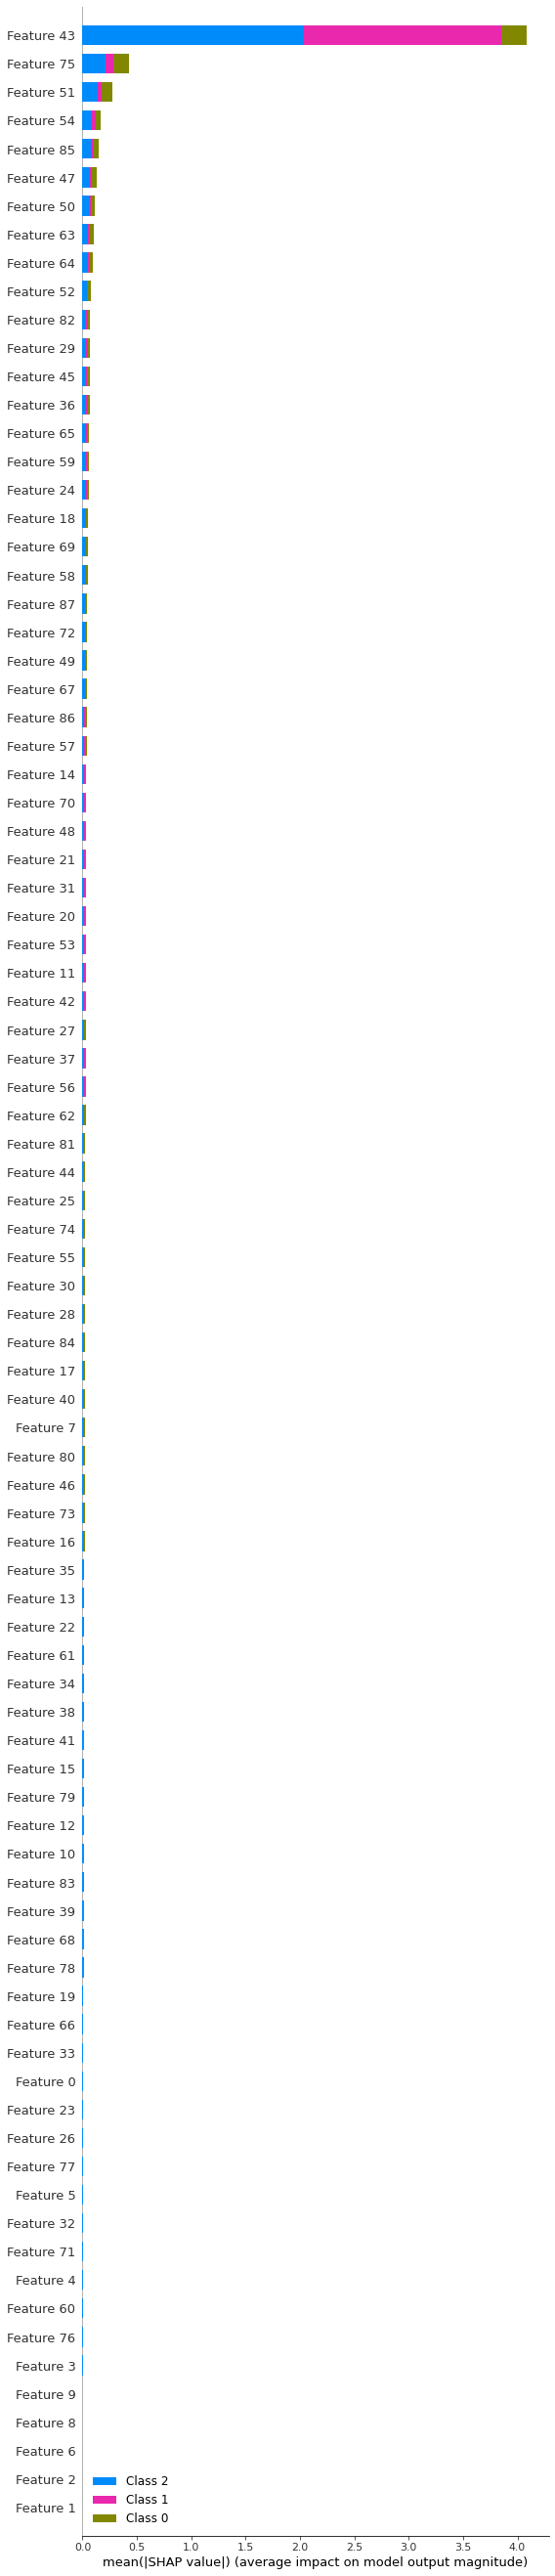

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(XX)
shap.summary_plot (shap_values, XX, max_display=XX.shape[1])


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X,approximate=True)
shap.summary_plot(shap_values, XX, plot_type="bar")

AssertionError: ignored

In [ ]:
# scenario 1: selecting blood pressure features only
feature_cols = ['Day Avg SBP','Day Avg DBP','Night Avg SBP','Night Avg DBP']
X = df[feature_cols] # Features
y = df.OSA_Severity # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3]


CatBoost model is fitted: False
CatBoost model parameters:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean of actual values :  3.7017543859649122
Mean of predicted values:  3.807017543859649


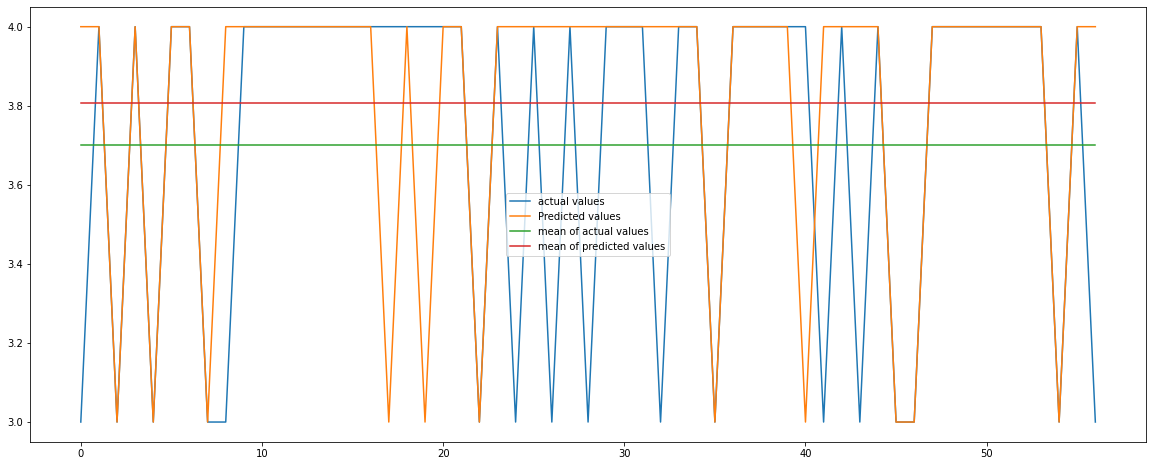

R-square score is : -0.00588235294117645
Accuracy: 0.7894736842105263
F1 score :  [0.57142857 0.86046512]


In [ ]:
#model building for scenario 1
from catboost import CatBoostClassifier,Pool
train_pool = Pool(X_train, Y_train)
eval_pool = Pool(X_test, Y_test)

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'],
    od_type = "Iter",
    od_wait = 100
)
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')

clf.fit(
    X_train, Y_train,
    eval_set=eval_pool,
    verbose=False,
    plot=True,
    early_stopping_rounds=10
)
predicted_y = clf.predict(X_test)
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# printing the mean
print("Mean of actual values : ", Y_test.mean())
print("Mean of predicted values: ", predicted_y.mean())

# plotting the graphs
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual values")
plt.plot([i for i in range(len(Y_test))],predicted_y, label="Predicted values")
plt.plot([i for i in range(len(Y_test))],[Y_test.mean() for x in range(len(Y_test))], label = "mean of actual values")
plt.plot([i for i in range(len(Y_test))],[predicted_y.mean() for y in range(len(Y_test))], label = 'mean of predicted values')

# showing the plotting
plt.legend()
plt.show()
from sklearn.metrics import  r2_score

# Evaluating the model
print('R-square score is :', r2_score(Y_test,  predicted_y))
clf.score(X_train,Y_train)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, predicted_y))
from sklearn.metrics import f1_score
print("F1 score : ",f1_score(Y_test, predicted_y, average=None))

In [ ]:
#scenario 2: features having age , demographic aspect and comorbidiies only
feature_cols = ['Age__years_', 'Sex', 'Presence_of_coronary_artery_dise','Presence_of_cerebrovascula_disea','Presence_of_diabetes','Presence_of_dyslipidemia__hyperc','Smoking_behavior___current_smoki','Smoking_behavior__consumption__','Presence_of_hypertension__yes_no','Details_of___history_of_hyperten','Arterial_hypertension_duration_r','Weight__kg_','Height__cm_','BMI','Abdomen_circumference__cm_']
X = df[feature_cols] # Features
y = df.OSA_Severity # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


CatBoost model is fitted: False
CatBoost model parameters:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean of actual values :  3.7017543859649122
Mean of predicted values:  3.789473684210526


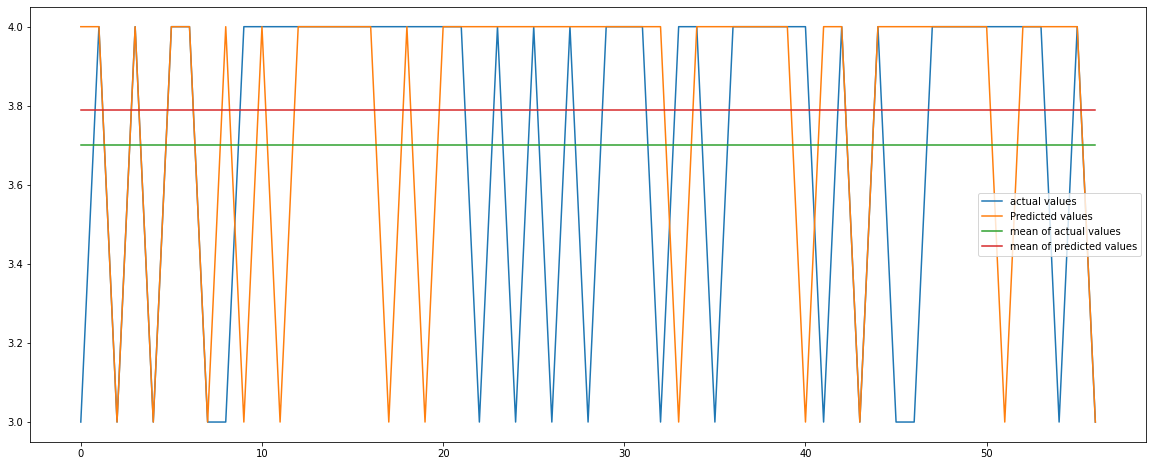

R-square score is : -0.5926470588235293
Accuracy: 0.6666666666666666
F1 score :  [0.34482759 0.77647059]


In [ ]:

#model for sceenario 2
from catboost import CatBoostClassifier,Pool
train_pool = Pool(X_train, Y_train)
eval_pool = Pool(X_test, Y_test)

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'],
    od_type = "Iter",
    od_wait = 100
)
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')

clf.fit(
    X_train, Y_train,
    eval_set=eval_pool,
    verbose=False,
    plot=True,
    early_stopping_rounds=10
)
predicted_y = clf.predict(X_test)
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# printing the mean
print("Mean of actual values : ", Y_test.mean())
print("Mean of predicted values: ", predicted_y.mean())

# plotting the graphs
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual values")
plt.plot([i for i in range(len(Y_test))],predicted_y, label="Predicted values")
plt.plot([i for i in range(len(Y_test))],[Y_test.mean() for x in range(len(Y_test))], label = "mean of actual values")
plt.plot([i for i in range(len(Y_test))],[predicted_y.mean() for y in range(len(Y_test))], label = 'mean of predicted values')

# showing the plotting
plt.legend()
plt.show()
from sklearn.metrics import  r2_score

# Evaluating the model
print('R-square score is :', r2_score(Y_test,  predicted_y))
clf.score(X_train,Y_train)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, predicted_y))
from sklearn.metrics import f1_score
print("F1 score : ",f1_score(Y_test, predicted_y, average=None))

In [ ]:
from sklearn.metrics import classification_report

pred=clf.predict(X_test)

print(classification_report(Y_test, predicted_y))

              precision    recall  f1-score   support

           3       0.42      0.29      0.34        17
           4       0.73      0.82      0.78        40

    accuracy                           0.67        57
   macro avg       0.57      0.56      0.56        57
weighted avg       0.64      0.67      0.65        57



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
CatBoost model is fitted: False
CatBoost model parameters:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean of actual values :  3.7017543859649122
Mean of predicted values:  3.8947368421052633


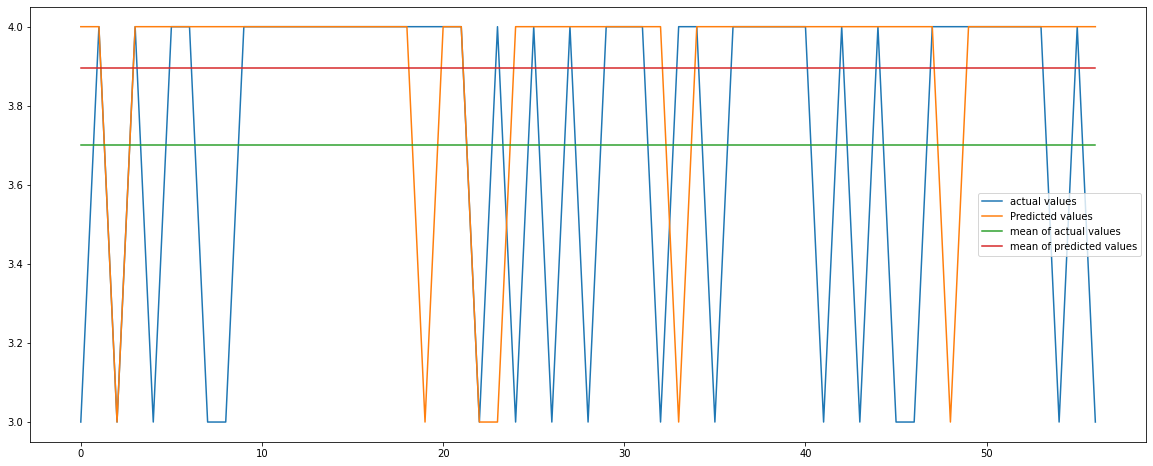

R-square score is : -0.5926470588235293


0.7920353982300885

In [ ]:
#scenario 3: selecting demographic features, comorbidity and blood pressure features
feature_cols = ['Age__years_', 'Sex', 'Presence_of_coronary_artery_dise','Presence_of_cerebrovascula_disea','Presence_of_diabetes','Presence_of_dyslipidemia__hyperc','Smoking_behavior___current_smoki','Smoking_behavior__consumption__','Presence_of_hypertension__yes_no','Details_of___history_of_hyperten','Arterial_hypertension_duration_r','Weight__kg_','Height__cm_','BMI','Abdomen_circumference__cm_','Day Avg SBP','Day Avg DBP','Night Avg SBP','Night Avg DBP']
X = df[feature_cols] # Features
y = df.OSA_Severity # Target variable
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
cat_features = list(range(0, X.shape[1]))
print(cat_features)
#model building for scenario 3
from catboost import CatBoostClassifier,Pool
train_pool = Pool(X_train, Y_train)
eval_pool = Pool(X_test, Y_test)

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'],
    od_type = "Iter",
    od_wait = 100
)
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')

clf.fit(
    X_train, Y_train,
    eval_set=eval_pool,
    verbose=False,
    plot=True,
    early_stopping_rounds=5
)
predicted_y = clf.predict(X_test)
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# printing the mean
print("Mean of actual values : ", Y_test.mean())
print("Mean of predicted values: ", predicted_y.mean())

# plotting the graphs
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual values")
plt.plot([i for i in range(len(Y_test))],predicted_y, label="Predicted values")
plt.plot([i for i in range(len(Y_test))],[Y_test.mean() for x in range(len(Y_test))], label = "mean of actual values")
plt.plot([i for i in range(len(Y_test))],[predicted_y.mean() for y in range(len(Y_test))], label = 'mean of predicted values')

# showing the plotting
plt.legend()
plt.show()
from sklearn.metrics import  r2_score

# Evaluating the model
print('R-square score is :', r2_score(Y_test,  predicted_y))
clf.score(X_train,Y_train)


In [ ]:
from sklearn.metrics import  r2_score

# Evaluating the model
print('R-square score is :', r2_score(Y_test,  predicted_y))
print("accuracy: ",clf.score(X_train,Y_train))
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, predicted_y))
from sklearn.metrics import f1_score
print("F1 score : ",f1_score(Y_test, predicted_y, average=None))

R-square score is : -0.5926470588235293
accuracy:  0.7920353982300885
Accuracy: 0.6666666666666666
F1 score :  [0.17391304 0.79120879]


In [ ]:
from sklearn.metrics import classification_report

pred=clf.predict(X_test)

print(classification_report(Y_test, predicted_y))

              precision    recall  f1-score   support

           3       0.33      0.12      0.17        17
           4       0.71      0.90      0.79        40

    accuracy                           0.67        57
   macro avg       0.52      0.51      0.48        57
weighted avg       0.59      0.67      0.61        57



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
CatBoost model is fitted: False
CatBoost model parameters:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean of actual values :  3.7017543859649122
Mean of predicted values:  3.8596491228070176


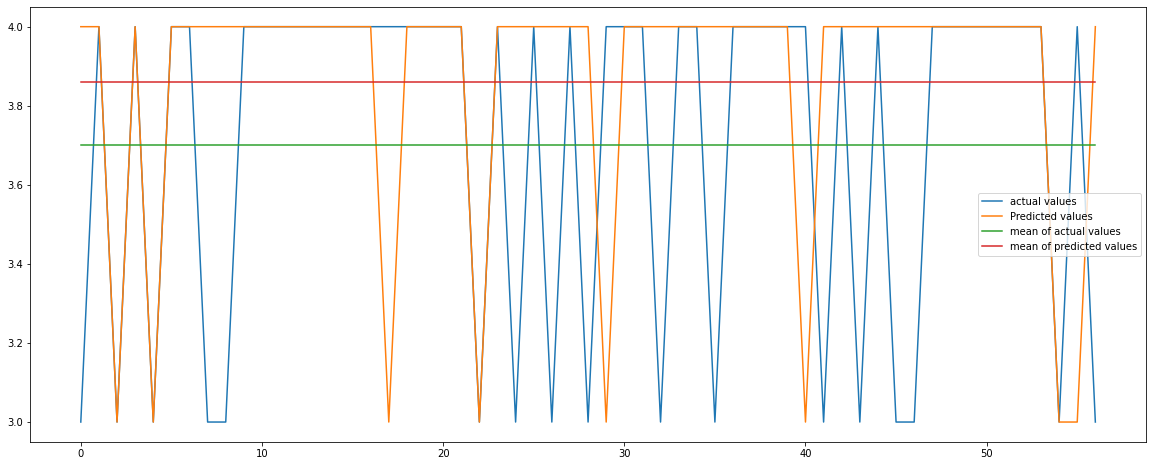

R-square score is : -0.4249999999999998
accuracy:  0.7964601769911505
Accuracy: 0.7017543859649122
F1 score :  [0.32       0.80898876]


KeyboardInterrupt: ignored

In [ ]:
#scenario 4: selecting important features for OSA
feature_cols = ['Age__years_', 'Sex', 'Presence_of_coronary_artery_dise','Presence_of_cerebrovascula_disea','Presence_of_diabetes','Presence_of_dyslipidemia__hyperc','Smoking_behavior___current_smoki','Smoking_behavior__consumption__','Presence_of_hypertension__yes_no','Details_of___history_of_hyperten','Arterial_hypertension_duration_r','Weight__kg_','Height__cm_','BMI','Abdomen_circumference__cm_','Day Avg SBP','Day Avg DBP','Night Avg SBP','Night Avg DBP','Creatinine','Glucose','Total_cholesterol','Triglycerides','HDL','LDL','AASI','Clinic_seated_sbp','Clinic_seated_dbp','Clinic_standing_SBP__1_measureme','Clinic_standing_DBP__1_measureme','Mean_nocturnal_satO2','Min_nocturnal_satO2','Recording_time_spent_at_a_SatO2','PWV','Delay_time_car_fem','Car_fem_distance']
X = df[feature_cols] # Features
y = df.OSA_Severity # Target variable
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
cat_features = list(range(0, X.shape[1]))
print(cat_features)
from sklearn.metrics import f1_score, log_loss
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
import catboost as cb
from sklearn.model_selection import cross_val_score
import numpy as np

from catboost import CatBoostClassifier,Pool
train_pool = Pool(X_train, Y_train)
eval_pool = Pool(X_test, Y_test)

clf = CatBoostClassifier(
    iterations=5,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'],
    od_type = "Iter",
    od_wait = 100
)
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')

clf.fit(
    X_train, Y_train,
    eval_set=eval_pool,
    verbose=False,
    plot=True,
    early_stopping_rounds=5
)
predicted_y = clf.predict(X_test)
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# printing the mean
print("Mean of actual values : ", Y_test.mean())
print("Mean of predicted values: ", predicted_y.mean())

# plotting the graphs
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual values")
plt.plot([i for i in range(len(Y_test))],predicted_y, label="Predicted values")
plt.plot([i for i in range(len(Y_test))],[Y_test.mean() for x in range(len(Y_test))], label = "mean of actual values")
plt.plot([i for i in range(len(Y_test))],[predicted_y.mean() for y in range(len(Y_test))], label = 'mean of predicted values')

# showing the plotting
plt.legend()
plt.show()
from sklearn.metrics import  r2_score

# Evaluating the model
print('R-square score is :', r2_score(Y_test,  predicted_y))
print("accuracy: ",clf.score(X_train,Y_train))
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, predicted_y))
from sklearn.metrics import f1_score
print("F1 score : ",f1_score(Y_test, predicted_y, average=None))
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(CatBoostClassifier(), X, y, cv=7, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred=clf.predict(X_test)

print(classification_report(Y_test, predicted_y))

**Scenerio # 05 | Without AHI_tot and after Shape Analysis**

In [ ]:
feature_cols = ['Clinic_standing_SBP__1_measureme', 'dHRnFix','Glucose','HDL','Day Avg DBP','Delay_time_car_fem','Creatinine','HRsd24_1','dSBPnFix']
X = df[feature_cols] # Features
y = df.OSA_Severity # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


CatBoost model is fitted: False
CatBoost model parameters:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean of actual values :  3.7017543859649122
Mean of predicted values:  3.824561403508772


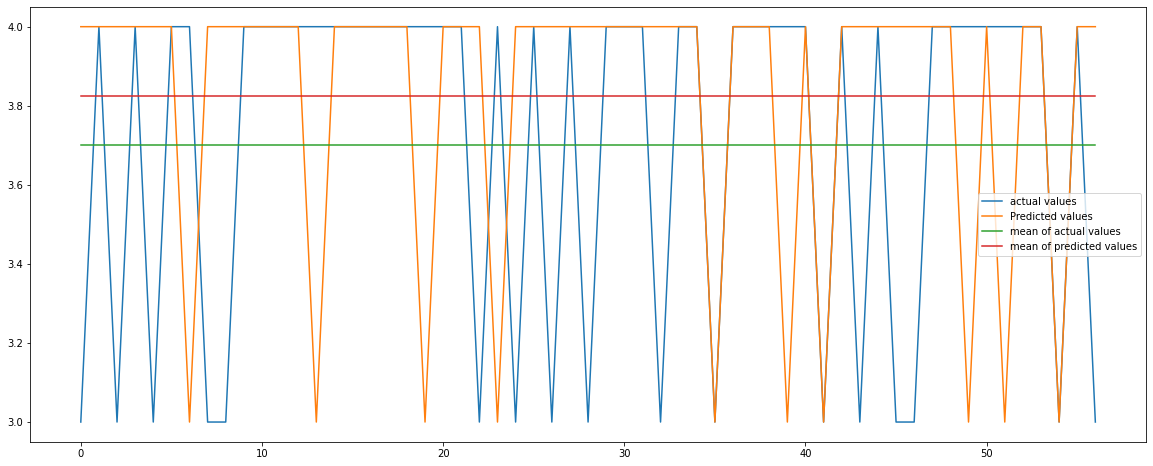

R-square score is : -0.7602941176470586
Accuracy: 0.631578947368421
F1 score :  [0.22222222 0.75862069]


In [ ]:
#model building for scenario 5
from catboost import CatBoostClassifier,Pool
train_pool = Pool(X_train, Y_train)
eval_pool = Pool(X_test, Y_test)

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'],
    od_type = "Iter",
    od_wait = 100
)
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')

clf.fit(
    X_train, Y_train,
    eval_set=eval_pool,
    verbose=False,
    plot=True,
    early_stopping_rounds=10
)
predicted_y = clf.predict(X_test)
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# printing the mean
print("Mean of actual values : ", Y_test.mean())
print("Mean of predicted values: ", predicted_y.mean())

# plotting the graphs
plt.plot([i for i in range(len(Y_test))],Y_test, label="actual values")
plt.plot([i for i in range(len(Y_test))],predicted_y, label="Predicted values")
plt.plot([i for i in range(len(Y_test))],[Y_test.mean() for x in range(len(Y_test))], label = "mean of actual values")
plt.plot([i for i in range(len(Y_test))],[predicted_y.mean() for y in range(len(Y_test))], label = 'mean of predicted values')

# showing the plotting
plt.legend()
plt.show()
from sklearn.metrics import  r2_score

# Evaluating the model
print('R-square score is :', r2_score(Y_test,  predicted_y))
clf.score(X_train,Y_train)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, predicted_y))
from sklearn.metrics import f1_score
print("F1 score : ",f1_score(Y_test, predicted_y, average=None))

In [ ]:
from sklearn.metrics import classification_report

pred=clf.predict(X_test)

print(classification_report(Y_test, predicted_y))

              precision    recall  f1-score   support

           3       0.30      0.18      0.22        17
           4       0.70      0.82      0.76        40

    accuracy                           0.63        57
   macro avg       0.50      0.50      0.49        57
weighted avg       0.58      0.63      0.60        57

